<a href="https://colab.research.google.com/github/JuanVallejo32/Curso-IA---Talentotech2/blob/main/Cacao.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Importar librerías
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
from scipy.stats import pearsonr
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, roc_auc_score
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler

In [2]:
#Leer y crear una copia del dataset
data1 = pd.read_excel('Cacao.xlsx')
data = data1.copy()
data

,Año,Departamento,Producto,Area (ha),Produccion (ton),Rendimiento (ha/ton),Produccion Nacional (ton),Area Nacional (ha)
0,2007,ANTIOQUIA,CACAO,7008.80,2892.20,0.41,5.03,6.61
1,2007,ARAUCA,CACAO,9467.00,6589.00,0.70,11.47,8.93
2,2007,BOLIVAR,CACAO,1545.00,557.70,0.36,0.97,1.46
3,2007,BOYACA,CACAO,1094.00,692.50,0.63,1.21,1.03
4,2007,CALDAS,CACAO,976.63,642.33,0.66,1.12,0.92
...,...,...,...,...,...,...,...,...
467,2022,SUCRE,CACAO,300.00,151.45,0.50,0.11,0.13
468,2022,TOLIMA,CACAO,10801.00,6433.50,0.60,4.72,4.70
469,2022,VALLE DEL CAUCA,CACAO,1492.28,944.60,0.63,0.69,0.65
470,2022,VAUPES,CACAO,141.20,39.57,0.28,0.03,0.06


In [3]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 472 entries, 0 to 471
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Año                        472 non-null    int64  
 1   Departamento               472 non-null    object 
 2   Producto                   472 non-null    object 
 3   Area (ha)                  472 non-null    float64
 4   Produccion (ton)           472 non-null    float64
 5   Rendimiento (ha/ton)       472 non-null    float64
 6   Produccion Nacional (ton)  472 non-null    float64
 7   Area Nacional (ha)         472 non-null    float64
dtypes: float64(5), int64(1), object(2)
memory usage: 29.6+ KB


In [4]:
data1.shape

(472, 8)

In [5]:
#Se crea un dataframe en la variable data con las columnas a trabajar y se reemplazan los valores 0.0 por NaN
data = data1[['Area (ha)', 'Produccion (ton)','Rendimiento (ha/ton)']]
data.replace(0.0, np.nan, inplace=True)
data

<ipython-input-5-a23bbbcd4808>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.replace(0.0, np.nan, inplace=True)


,Area (ha),Produccion (ton),Rendimiento (ha/ton)
0,7008.80,2892.20,0.41
1,9467.00,6589.00,0.70
2,1545.00,557.70,0.36
3,1094.00,692.50,0.63
4,976.63,642.33,0.66
...,...,...,...
467,300.00,151.45,0.50
468,10801.00,6433.50,0.60
469,1492.28,944.60,0.63
470,141.20,39.57,0.28


In [6]:
#Separación variables y se eliminan los datos NaN
X = data[['Area (ha)','Produccion (ton)']].dropna()
y = data['Rendimiento (ha/ton)'].dropna()

In [8]:
#Divido datos de entrenamiento
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [9]:
#creacion del modelo
rf_regresion = RandomForestRegressor(n_estimators=100, random_state=42)
#se entrena el modelo
rf_regresion.fit(X_train, Y_train)
#se crea la prediccion
y_pred_rf = rf_regresion.predict(X_test)

In [10]:
#se crea el error medio cuadrado
mse = mean_squared_error(Y_test, y_pred_rf)
# se crea el R2 random forest
r2_rf = r2_score(Y_test, y_pred_rf)

# se imprime los resultados
print(f'Mean Squared Error: {mse:.2f}')
print(f'R-squared Score: {r2_rf:.2f}')

Mean Squared Error: 0.00
R-squared Score: 0.78


In [11]:
# se realiza validacion cruzada
cvs_rf = cross_val_score(rf_regresion, X, y, cv=5, scoring='r2')
# se calcula la media de la validacion cruzada
cvs_rf_mean = cvs_rf.mean()
# se calcula la mediana de la validacion cruzada
cvs_rf_median = np.median(cvs_rf)



print(f'Validacion cruzada con R2 en Random Forest: {cvs_rf}')
print(f'Validacion cruzada con R2 con la media de Random Forest: {cvs_rf_mean}')
print(f'Validacion cruzada con R2 con la mediana de Random Forest: {cvs_rf_median}')

Validacion cruzada con R2 en Random Forest: [0.58093381 0.7833816  0.75816543 0.76060777 0.72234998]
Validacion cruzada con R2 con la media de Random Forest: 0.7210877197838979
Validacion cruzada con R2 con la mediana de Random Forest: 0.7581654349470407


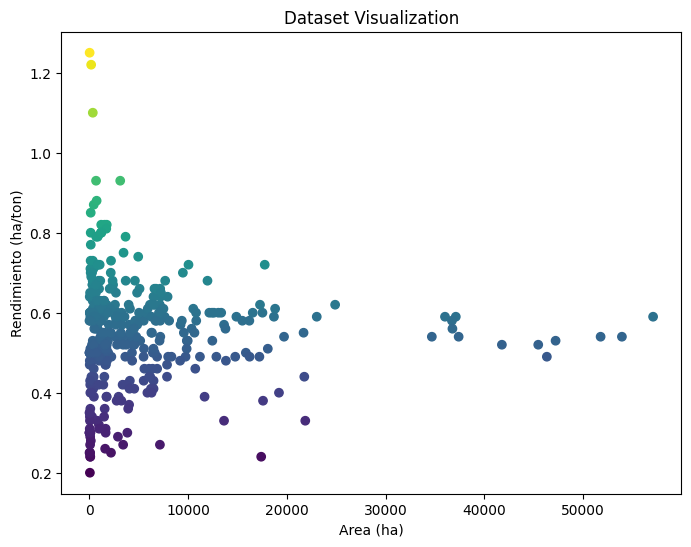

In [12]:
#se grafica
fig, ax = plt.subplots(figsize=(8, 6))
ax.scatter(X_train['Area (ha)'], Y_train, c=Y_train.values.ravel(), cmap='viridis')

#linea de codigo donde se genera un vertice pero se descuadra todo el grafico
#ax.plot([x_test.min(), x_test.max()], [x_test.min(), x_test.max()], 'k--', lw=1)

ax.set_xlabel('Area (ha)')
ax.set_ylabel('Rendimiento (ha/ton)')
ax.set_title("Dataset Visualization")
plt.show()